<a href="https://colab.research.google.com/github/roilhi/MetNum_ITECI_2020/blob/gh-pages/SILVA_RAUL_TrabajoFinalMetNum_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TRABAJO FINAL METODOS NUMERICOS



*  Maestro: Roilhi Frajo Ibarra Hernández
*  Escuela: Universidad Ensenada
*  Carrera: Ingeniería Industrial
*  Materia: Metodos numéricos
* Alumno: Raúl Silva Concha 





*En el los siguientes codigos aplicaremos funciones,ciclos,graficos y libretas las cuales son necesarias para llevar a cabo estos procedimientos. 
utilizaremos (def) para funciones

*   (def) para funciones
*  (while,elif,else,if etc)para ciclos y condicionales
*  (numpy,sympy )para matematicas simbolicas
*   (matplot.lib)para representar graficos






---





1. Unidad #1 Raices de *ecuaciones* 

                    Metodo de biseccion

A continuacion se presenta un ejemplo el cual es Encontrar la solucion de la ecuacion $x^3-2x^2-1=0$

In [ ]:
# implementacion del metodo de biseccion en python
def f(x):
  return x ** 3 - 2 *x **2 - 1
a = 0   
b = 4
error = 10
while error > 1e-8:
  c = (a + b) / 2
  fa = f(a)
  fc = f(c) 
  if fc == 0:
    raiz = c
    break
  elif fa * fc< 0 :
    b = c 
  else:
    a = c 
raiz = c
error = abs (fc)
 
print(raiz)

2.2055694304005904


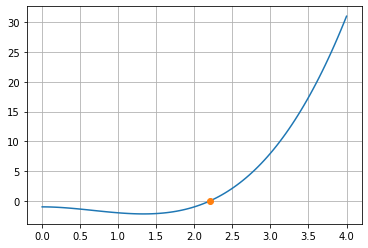

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
 
x = np.linspace(0, 4, 101)
plt.plot(x, f(x))
# Mostrar el punto de la raíz en la gráfica:
plt.plot(raiz,0,'o',label='raíz encontrada') 
plt.grid()
plt.show()

In [ ]:
f(raiz)

0.0

In [ ]:
f(2.2055694304005904)


0.0



2. Unidad 2 Interpolacion y regresion numerica
**Metodo de interpolacion de Lagrange**

Como siguiente ejemplo se presento interpolacion lagrange
Donde los valores asignados son :
$$ xi = 1,3,5,7 $$
$$ f(xi) = -2,1,2,3 $$



    valores de fi:  [-2  1  2  3]
divisores en L(i):  [-48.  16. -16.  48.]

Polinomio de Lagrange, expresiones
(x - 7)*(x - 5)*(x - 3)/24 + (x - 7)*(x - 5)*(x - 1)/16 - (x - 7)*(x - 3)*(x - 1)/8 + (x - 5)*(x - 3)*(x - 1)/16

Polinomio de Lagrange: 
x**3/24 - 5*x**2/8 + 83*x/24 - 39/8


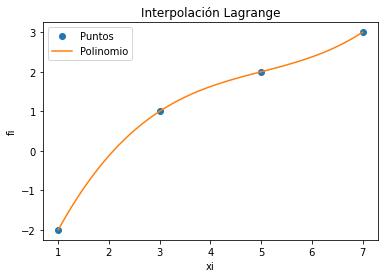

In [ ]:
# EJemplo de Interpolación de Lagrange
# divisoresL solo para mostrar valores
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

# A CONTINUACIÓN INGRESO , Datos de prueba
xi = np.array([1, 3, 5, 7])
fi = np.array([-2, 1, 2, 3])

# PROCEDIMIENTO
# Polinomio de Lagrange
n = len(xi)
x = sym.Symbol('x')
polinomio = 0
divisorL = np.zeros(n, dtype = float)
for i in range(0,n,1):
    # Termino de Lagrange
    numerador = 1
    denominador = 1
    for j  in range(0,n,1):
        if (j!=i):
            numerador = numerador*(x-xi[j])
            denominador = denominador*(xi[i]-xi[j])
    terminoLi = numerador/denominador
    polinomio = polinomio + terminoLi*fi[i]
    divisorL[i] = denominador
# simplifica el polinomio
polisimple = polinomio.expand()
# para evaluación numérica
px = sym.lambdify(x,polisimple)

# Puntos para la gráfica
muestras = 101
a = np.min(xi)
b = np.max(xi)
pxi = np.linspace(a,b,muestras)
pfi = px(pxi)

# Salida
print('    valores de fi: ',fi)
print('divisores en L(i): ',divisorL)
print()
print('Polinomio de Lagrange, expresiones')
print(polinomio)
print()
print('Polinomio de Lagrange: ')
print(polisimple)

# Gráfica
plt.plot(xi,fi,'o', label = 'Puntos')
plt.plot(pxi,pfi, label = 'Polinomio')
plt.legend()
plt.xlabel('xi')
plt.ylabel('fi')
plt.title('Interpolación Lagrange')
plt.show()



3. Unidad 3   Itegracion y diferenciacion numericas
**Metodo de trapecio**



Numero de datos para analizar 3
ancho de loa trapecios 2.666666667
introduce los datos
x[0]=-3
fx[0]=-3375
x[1]=-0.333333333
fx[1]=-81.37037037
x[2]=2.333333333
fx[2]=254.037037
el valor de la integral:  338.71604937567275


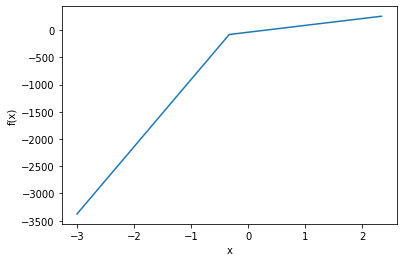

In [ ]:
#metodo de trapecio multiple

import numpy as np
import matplotlib.pyplot as plt

def trapecio(n,x,fx,t):
  sum=0
  for i in range(1,n):
    sum=sum+fx[i]
  I=(x[n]-x[0])*(fx[n])/(2*t)
  return I

num=int(input("Numero de datos para analizar "))
h=float(input("ancho de loa trapecios "))
n=num
x=np.zeros([n])
fx=np.zeros([n])
print("introduce los datos")
for i in range(0,n):
  x[i]=input("x["+str(i)+"]=")
  fx[i]=input("fx["+str(i)+"]=") 

#ajuste respecto a la posicion
n=num-1
t=(x[n]-x[0])/h
print("el valor de la integral: ",trapecio(n,x,fx,t))
#grafica
plt.plot(x,fx)
plt.ylabel('f(x)')
plt.xlabel('x')
plt.show()

Eliminacion por metodo Gauss jordan //falta arreglar error

In [ ]:
import numpy
m=int(raw_input('Valor de m:'))
n=int(raw_input('Valor de n:'))
matrix = numpy.zeros((m,n))
vector= numpy.zeros((n))
x=numpy.zeros((m))
print ('Introduce la matriz de coeficientes y el vector solución')
for r in range(0,m):
    for c in range(0,n):
        matrix[(r),(c)]=(raw_input("Elemento a["+str(r+1)+","+str(c+1)+"]"))
    vector[(r)]=(raw_input('b['+str(r+1)+']: ')) 
print(matrix)

for k in range (0,m):
    for r in range(k+1,m):
        factor=(matrix[r,k]/matrix[k,k])
        vector[r]=vector[r]-(factor*vector[k])
        for c in range(0,n):
            matrix[r,c]=matrix[r,c]-(factor*matrix[k,c])

#sustitución hacia atrás
x[m-1]=vector[m-1]/matrix[m-1,m-1]
print x[m-1]

for r in range(m-2,-1,-1):
   suma=0
   for c in range(0,n):
      suma=suma+matrix[r,c]*x[c]
  x[r]=(vector[r]-suma)/matrix[r,r]


print 'Resultado matriz'
print(matrix)
print 'Resultado del vector'
print(vector)
print 'Resultados: '
print(x)

SyntaxError: ignored

Eliminacion gaussiana 

4. Unidad 4 Sistema de ecuaciones lineales 
Para demostrar que:
$$ x=2,y=1,z=-2 $$
son las soluciones del sistema de ecuaciones lineales
$$ x+2y+z=2 $$
$$ 3x+8y+z=12 $$
$$ 4y+z+2 $$


In [ ]:
import numpy as np

A=np.array([[1,2,1],
            [3,8,1],
            [1,4,1]])

b=np.array([2,12,2])

N=len(b)
x=np.zeros(N)

for i in range(N):
  x[i]=b[i]/A[i][i]

e=np.linalg.norm(A@x-b)  

print(x,e)

[2.  1.5 2. ] 12.36931687685298


A continuacion otro metodo de gaussjordan

In [ ]:
import numpy
def gaussJordan(matriz, vector):

    matrix = numpy.array(matriz, dtype=numpy.float64)
    vector = numpy.array(vector, dtype=numpy.float64)

    m = len(vector)
    x = numpy.zeros(m)

    for k in range(0, m):
        for r in range(k+1, m):
            factor=(matrix[r,k]/matrix[k,k])
            vector[r]=vector[r]-(factor*vector[k])
            for c in range(0,m):
                matrix[r,c]=matrix[r,c]-(factor*matrix[k,c])

    x[m-1]=vector[m-1]/matrix[m-1, m-1]

    for r in range(m -1, -2, -1):
        suma = 0
        for c in range(0,m):
            suma=suma+matrix[r,c]*x[c]
        x[r]=(vector[r]-suma)/matrix[r, r]  
    return x

print(gaussJordan([[1,2,1],[3,8,1],[1,4,1]],[2,12,2]))

[-4.  3. -3.]


calculo del error relativo porcentual 

$$\epsilon_r = \left \lvert \frac{V_r-Vn}{Vn}\right\rvert \times 100 $$

In [ ]:
#FUNCION QUE CALCULE EL ERROR RELATIVO
def ErrorRelativo(vreal,vnum):
  epsilon = abs((vreal-vnum)/vreal)*100
  return epsilon